#  Unlock Your Best Customers Through RFM Analysis

    Understanding each customer’s behavior: how recently they visited (Recency),
                                            how often they come back (Frequency),  
                                            how much they spend (Monetary).
                                        
    Understanding customer's behavior will help us to :
                                           Identify loyal customers.
                                           Simplify data to spotlight regular, high-spending visitors.
                                           Deliver personalized deals that turn regulars into superfans

    Discovering hidden potential in the customer data to build a more tailored, engaging experience.

In [1]:
import pandas as pd

# Loading Customer Data

In [2]:
customer_df = pd.read_csv(r'C:\Users\Bhavitha Redrouthu\Desktop\MSIT\Completed Courses\PDA\customer_data.csv')

In [3]:
customer_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


              Feature Description:
                    CustomerID           : Unique Identifier of customer
                    PurchaseDate         : Date when customer made a purchase
                    TransactionAmount    : Amount Spent Per Transaction 
                    ProductInformation   : Name Of Prodct
                    OrderID              : Unique Identifier of order
                    Location             : Store Location where the purchase was made.
             
              There are no null values. 

# Recency Calculation

# How many days ago did each customer visit the store to make a purchase?

In [5]:
import datetime

customer_df['PurchaseDate'] = pd.to_datetime(customer_df['PurchaseDate'])
recent_purchase_date= customer_df['PurchaseDate'].max()

customer_df['Recency']= (recent_purchase_date - customer_df['PurchaseDate']).dt.days
customer_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60
1,2188,2023-04-11,463.70,Product A,176819,London,60
2,4608,2023-04-11,80.28,Product A,340062,New York,60
3,2559,2023-04-11,221.29,Product A,239145,London,60
4,9482,2023-04-11,739.56,Product A,194545,Paris,60
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0
996,6669,2023-06-10,941.50,Product C,987025,New York,0
997,8836,2023-06-10,545.36,Product C,512842,London,0
998,1440,2023-06-10,729.94,Product B,559753,Paris,0


# Frequency Calculation

# How often does each customer make a purchase?

In [6]:
frequency_data = customer_df.groupby('CustomerID')['OrderID'].nunique().reset_index()

frequency_data = frequency_data.rename(columns= {"OrderID" : "Frequency"})

customer_df = customer_df .merge(frequency_data,on="CustomerID",how='left')
customer_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1
1,2188,2023-04-11,463.70,Product A,176819,London,60,1
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1
3,2559,2023-04-11,221.29,Product A,239145,London,60,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1
...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1
997,8836,2023-06-10,545.36,Product C,512842,London,0,1
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1


# Monetary Value

# What is each customer's total spending ?

In [7]:
cust_transaction_total = customer_df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()

cust_transaction_total = cust_transaction_total.rename(columns={"TransactionAmount":"MonetaryValue"})

customer_df = customer_df.merge(cust_transaction_total,on='CustomerID',how='left')
customer_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,0,1,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1,729.94


# Calculating RFM Scores for Customer Segmentation

In [8]:
import numpy as np

#Recency: Assigns scores (1-5) based on purchase recency using predefined bins.
recency_bins = [-1,30,60,90,180,np.inf]
recency_labels = [5,4,3,2,1]
customer_df['RecencyScore'] = pd.cut(customer_df['Recency'],bins=recency_bins,labels=recency_labels,right=True)

#Frequency: Assigns scores (1-5) based on purchase frequency with specified bins.
frequency_bins = [0,1,2,3,4,np.inf]
frequency_labels = [1,2,3,4,5]
customer_df['FrequencyScore'] = pd.cut(customer_df['Frequency'],bins=frequency_bins,labels=frequency_labels,right=True)

#Monetary: Assigns scores (1-5) based on spending using defined monetary bins.
monetary_bins = [0,100,200,300,400,np.inf]
monetary_labels = [1,2,3,4,5]
customer_df['MonetaryScore']= pd.cut(customer_df['MonetaryValue'],bins=monetary_bins,labels=monetary_labels,right=True)

#RFM Score: Combines individual scores into a total RFM score.
customer_df[['RecencyScore','FrequencyScore','MonetaryScore']] = customer_df [['RecencyScore','FrequencyScore','MonetaryScore']].astype(int)
customer_df['RFM_Score'] = customer_df ['RecencyScore']+ customer_df['FrequencyScore']+customer_df['MonetaryScore']

customer_df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,4,1,5,10
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,4,1,5,10
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,4,1,1,6
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,4,1,3,8
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,4,1,5,10


# Segmenting customers into low, mid, and high-value categories based on their RFM scores,to better understand their significance in the business

In [9]:
#Segment Labels: Defines 'Low-Value', 'Mid-Value', and 'High-Value'.
segment_labels = ['Low Engagement Customers', 'Moderate Engagement Customers', 'Top Customers']

#Creates a 'Value Segment' column and used pd.qcut() to categorize customers based on RFM scores.
customer_df['Value Segment'] = pd.qcut(customer_df['RFM_Score'], q=3, labels=segment_labels)
customer_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,4,1,5,10,Low Engagement Customers
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,4,1,5,10,Low Engagement Customers
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,4,1,1,6,Low Engagement Customers
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,4,1,3,8,Low Engagement Customers
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,4,1,5,10,Low Engagement Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1,759.62,5,1,5,11,Moderate Engagement Customers
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1,941.50,5,1,5,11,Moderate Engagement Customers
997,8836,2023-06-10,545.36,Product C,512842,London,0,1,545.36,5,1,5,11,Moderate Engagement Customers
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1,729.94,5,1,5,11,Moderate Engagement Customers


# Visualizing The Customer Segments

<AxesSubplot:ylabel='count'>

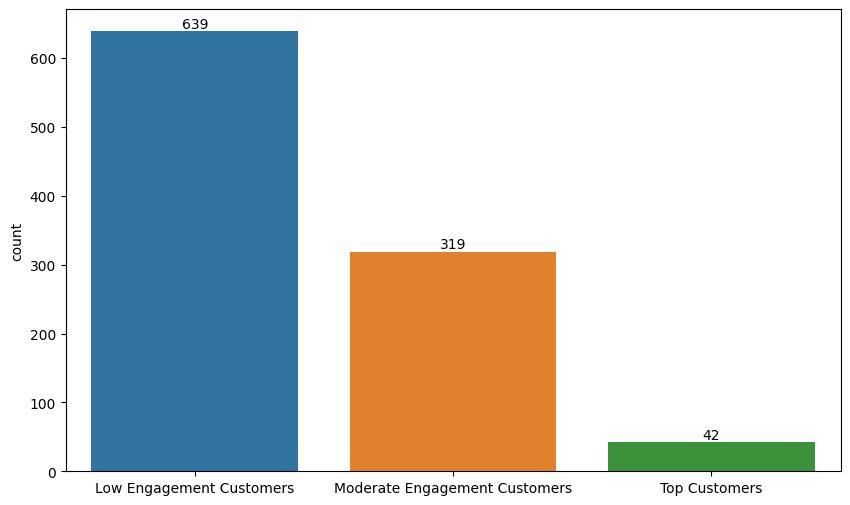

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
count_plt = sns.countplot(x='Value Segment',data=customer_df)
count_plt.bar_label(count_plt.containers[0])
count_plt.set_xlabel('')
count_plt

            Insights :
                - Majority of customers fall within the Low Engagement category, indicating a need to enhance customer                               experience and satisfaction. 
                
            Strategies to Convert Low-Value & Mid-Value Customers to High-Value:
                - Personalized Offers     : Tailor discounts and bundles for low-value segments.
                - Loyalty Programs        : Use tiered rewards to incentivize higher spending.
                - Enhanced Experience     : Offer accessible support and hassle-free returns.
                - Upsell/Cross-Sell       : Suggest premium items and product bundles in-cart.
                - Targeted Campaigns      : Send exclusive flash sales.
                - Feedback Surveys        : Collect insights and incentivize feedback from low spenders.
                - Seasonal Promotions     : Offer exclusive deals around holidays and special events.
                
           Retention Strategies For Top Customers
               - Personalized Experience  : Tailor interactions to individual needs.
               - Exceptional Service      : Provide dedicated support and quick resolutions.
               - Loyalty Rewards          : Offer exclusive perks and benefits.
               - Community Building       : Foster a sense of community among high-value customers.
               - Lifetime Value Focus     : Prioritize long-term customer relationships.
               - Proactive Upselling      : Offer relevant products and services.